Accuracy: 0.7988826815642458
Confusion Matrix:
 [[92 13]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



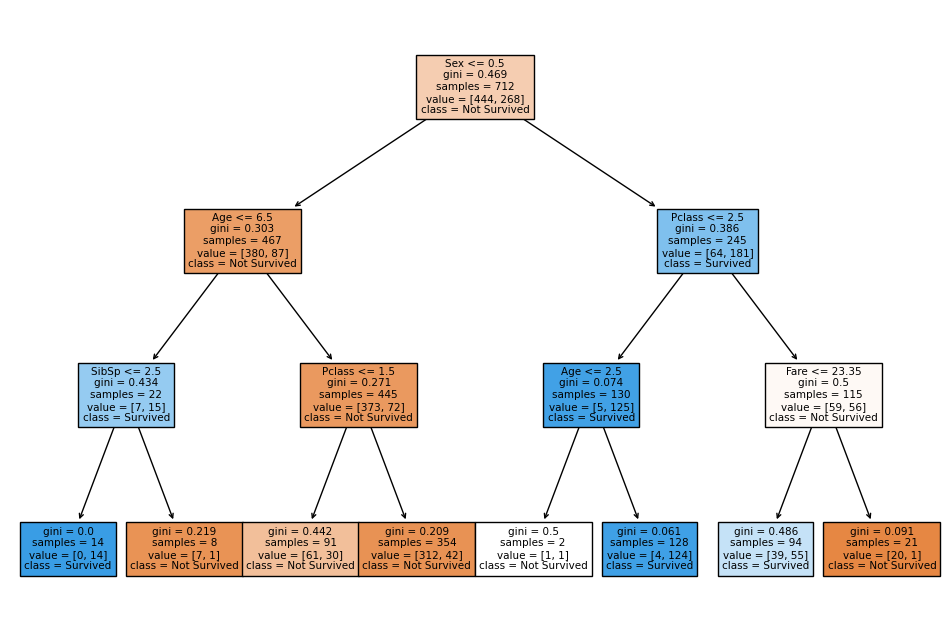

In [4]:
#---DECISION TREE-------

# Import necessary libraries for Keras and TensorFlow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the Titanic dataset from the given path
data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")


# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop irrelevant columns
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values in 'Age'
data['Age'] = data['Age'].fillna(data['Age'].median())


X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[94 11]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



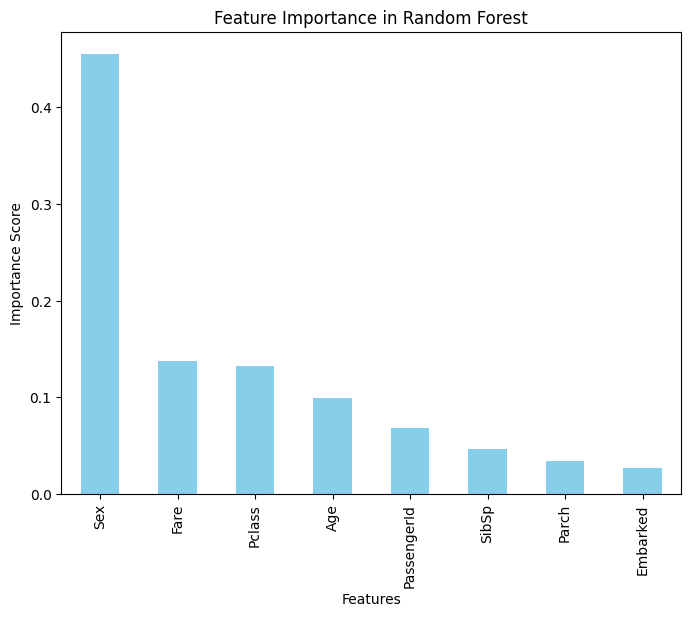

In [5]:
#--------------------RANDOM FOREST-----------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Titanic dataset from the given path
data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")


# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop irrelevant columns
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing 'Age' with median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


# Make predictions
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


# Feature importance
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Feature Coefficients:
 Sex            2.604596
Embarked       0.226127
Fare           0.002858
PassengerId    0.000357
Age           -0.031133
Parch         -0.105931
SibSp         -0.296776
Pclass        -0.957247
dtype: float64


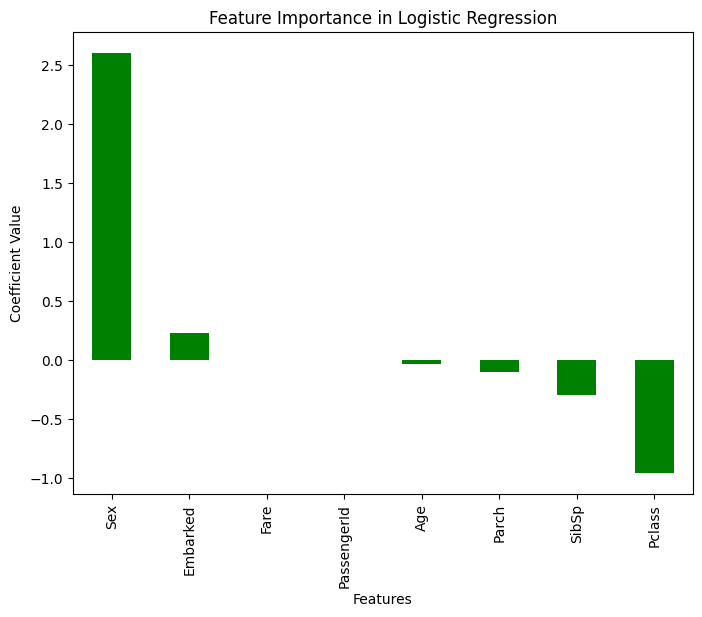

In [6]:
#--------LOGISTIC REGRESSION---------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Titanic dataset from the given path
data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")


# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop irrelevant columns
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())

# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)



# Make predictions
y_pred = log_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))




# Feature importance
coefficients = pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=False)

# Display coefficients
print("Feature Coefficients:\n", coefficients)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
coefficients.plot(kind='bar', color='green')
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()






Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6420 - loss: 0.7363 - val_accuracy: 0.6503 - val_loss: 0.6917
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6324 - loss: 0.7010 - val_accuracy: 0.6503 - val_loss: 0.6669
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6268 - loss: 0.6738 - val_accuracy: 0.6503 - val_loss: 0.6463
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6326 - loss: 0.6620 - val_accuracy: 0.6503 - val_loss: 0.6262
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: 0.6248 - val_accuracy: 0.6503 - val_loss: 0.6055
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6418 - loss: 0.6092 - val_accuracy: 0.6643 - val_loss: 0.5856
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6167 - loss: 0.6185 - val_accuracy: 0.7063 - val_loss: 0.5679
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6723 - loss: 0.5980 - val_accuracy: 0.7343 - val_loss: 0.5486
Ep

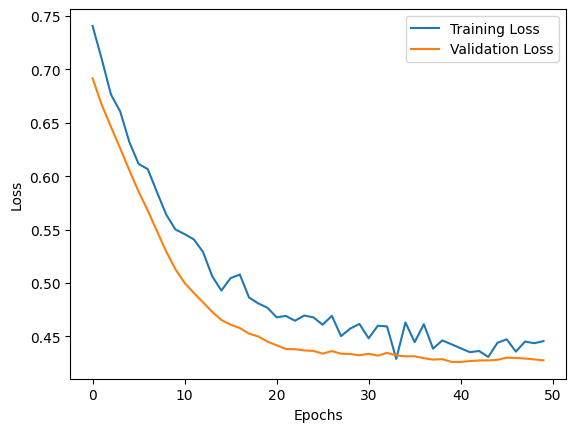

In [7]:
#-----------NETURAL NETWORK ---------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the Titanic dataset from the given path
data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop irrelevant columns
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing 'Age' with median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize the model
model = Sequential()

# Input layer and hidden layers
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(8, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)



# Evaluate on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()







In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Titanic dataset from the given path
data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop irrelevant columns
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing 'Age' with median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)



# Make predictions
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Perform grid search
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_





Accuracy: 0.8100558659217877
Confusion Matrix:
 [[93 12]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [ ]:
#---------------------------------------------